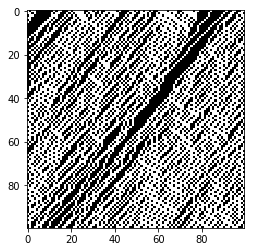

In [2]:
#import random 
import numpy as np
import matplotlib.pyplot as plt

R = 100 #Länge d. str.
t = 100#Zeit/iterationen
D =0.5#dichte
P = 0.25 #Trödelfaktor
vmax = 5 #Maximalgeschwindigkeit

file = open('vd.txt','w') #kreiere und öffne Textdatei für die Werte der Durchschnittsgeschwindigkeit pro Iterationsschritt

auto_anzahl=int(R*D) #mache aus dichte eine ganzzahlige Auto Anzahl
anfangszustand = [0]*(R-auto_anzahl)+[1]* auto_anzahl #wir haben leere plätze als 0 und autos als 1 definiert, liste
np.random.shuffle(anfangszustand) #anfangszustand zufällig, elemente in liste werden vertauscht

A=np.zeros((t,R)) #nullmatrix mit der Länge R (Länge der Straße) in x-Richtung und t in i-Richtung (Iterationsschritte/Zeitschritte)
for x in range(R-1):
    if anfangszustand[x]==1:
        A[0][x]=1 #schreie Anfangszustand in die 0te Zeile der Matrix

for i in range(t-1):
    v_ges=0
    for x in range(R-1):
        if A[i][x]==1:
            v=1
            d=1
            
            while A[i][(x+d)%R]==0: #berechne Abstad d bis zum nächsten Auto
                d+=1
               # if A[i][(x+d)%R]==1:
                #    break
                
            if d>v+1 and v<vmax: #auto beschleunigt, überhlen aber nicht; werden nicht schneller als Maximalgeschwindigkeit
                v+=1
            if v>0 and d<=v: #Auto bremst , wenn abstand nicht groß genug; wird nicht negativ
                v=d-1
            if v>0 and np.random.rand()<P: #Trödelfaktor
                v-=1
            if v<0:
                v=0
            if A[i][R-1]==1: #auto springt an den anfang der straße wenn es am ende angelangt ist
                A[i+1][0]=1
            v_ges+=v #summiere alle geschwindigkeiten der Auto in einem Iterationsschritt
            A[i+1][(x+v)%R]=1 
        vges_float=float(v_ges) #von int in float
        v_mittel=float(vges_float/auto_anzahl) #berechne durchschnittsgeschwindigkeit pro Iterationsschritt
    file.write(str(v_mittel)) #schreibe durchschnttsgeschwindigkeit in Textdatei
    file.write('\n') #setzte Curser eine Zeile nach unten

file.close() #schließe Textdatei

plt.imshow(A, cmap="Greys", interpolation="nearest") #plotte Matrix
plt.show()


In [3]:
#Fluss berechnen
file=open('fluss.txt','w') #öffne Textdatei für die Werte des Flusses

for x in range(R): 
    F=0
    for i in range(t-1):
        if A[i][x]==1 and A[i+1][x]==0 or A[i][x]==0 and A[i+1][x]==1: #Zähle die Autos an einer stelle x über alle iterationen
            F+=1
        F_float=float(F) #int in float
        fluss= float(F_float/t) #berechne fluss(teile durch die zeit -> autos pro sekunde an der stelle x)
    #print(fluss) 
    file.write(str(fluss)) #schreibe Werte in Textdatei
    file.write('\n') #setzte Curser eine Zeile nach unten

file.close() #schließe Textdatei